In [1]:
import sys
sys.path.append('../')

import numpy as np

from geometry import Geometry
from forcing import Forcing
from layer import LayerModel

from plotfunctions import prettyplot

#np.set_printoptions(precision=2)
np.seterr(all='ignore')

%matplotlib notebook
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [2]:
N = 1

In [3]:
geom = Geometry('Dotson')
geom.coarsen(N=N)
geom = geom.create()

Resolution set to 0.5 km
Geometry Dotson_0.5 created


In [4]:
#forc = Forcing(geom).tanh(ztcl=-550,Tdeep=0)
forc = Forcing(geom).mitgcm(startyear=1956,endyear=2000)

In [5]:
layer = LayerModel(forc)
#layer.Ah =100
#layer.Kh =100
layer.dt = N*30
#layer.Cd *= .1
#layer.Cdtop *= .1

inverting y-coordinates


In [ ]:
%%time
ds = layer.compute(days=40,restartfile='mitgcm_1956_2000_150.000')

Starting from restart file at day 150.000
 150.100 days ||  72.174 |  686.510 m ||  14.109 |  302.005 m/yr ||  0.799 % ||  0.337  0.052 |  0.376 Sv ||  0.123 m/s ||   -0.854 C ||   34.219 psu
 150.200 days ||  72.125 |  686.510 m ||  14.255 |  304.208 m/yr ||  0.800 % ||  0.340  0.051 |  0.351 Sv ||  0.124 m/s ||   -0.854 C ||   34.219 psu
 150.300 days ||  72.125 |  686.511 m ||  14.130 |  303.222 m/yr ||  0.809 % ||  0.334  0.051 |  0.326 Sv ||  0.124 m/s ||   -0.854 C ||   34.219 psu
 150.400 days ||  72.173 |  686.510 m ||  14.132 |  301.308 m/yr ||  0.808 % ||  0.334  0.050 |  0.306 Sv ||  0.122 m/s ||   -0.854 C ||   34.219 psu
 150.500 days ||  72.200 |  686.510 m ||  13.930 |  302.143 m/yr ||  0.810 % ||  0.328  0.050 |  0.340 Sv ||  0.121 m/s ||   -0.854 C ||   34.219 psu
 150.600 days ||  72.147 |  686.510 m ||  13.909 |  302.399 m/yr ||  0.809 % ||  0.328  0.050 |  0.368 Sv ||  0.122 m/s ||   -0.854 C ||   34.219 psu
 150.700 days ||  72.094 |  686.510 m ||  14.017 |  302.57

/nobackup/users/lambert/miniconda3/envs/kpz/lib/python3.8/site-packages/matplotlib/patches.py:3024: RuntimeWarning: invalid value encountered in double_scalars
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


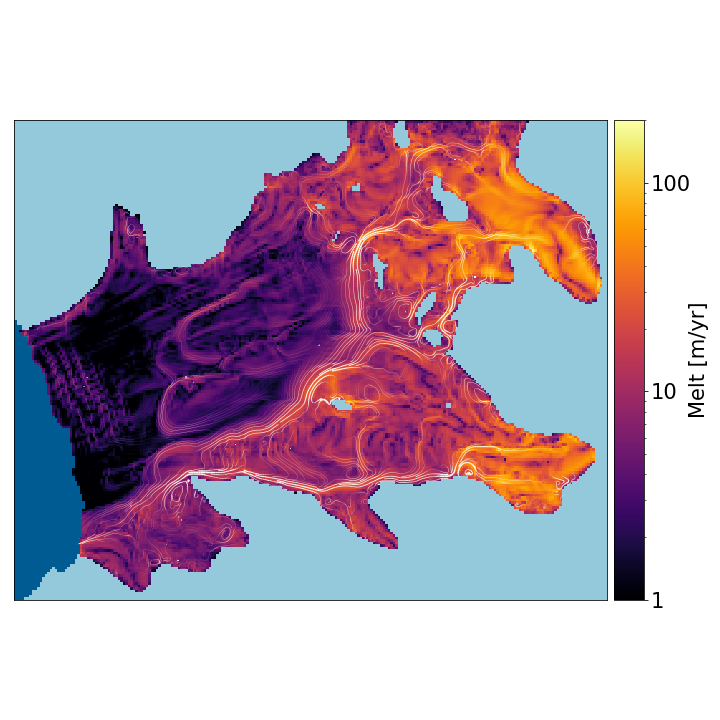

In [50]:
prettyplot(ds)